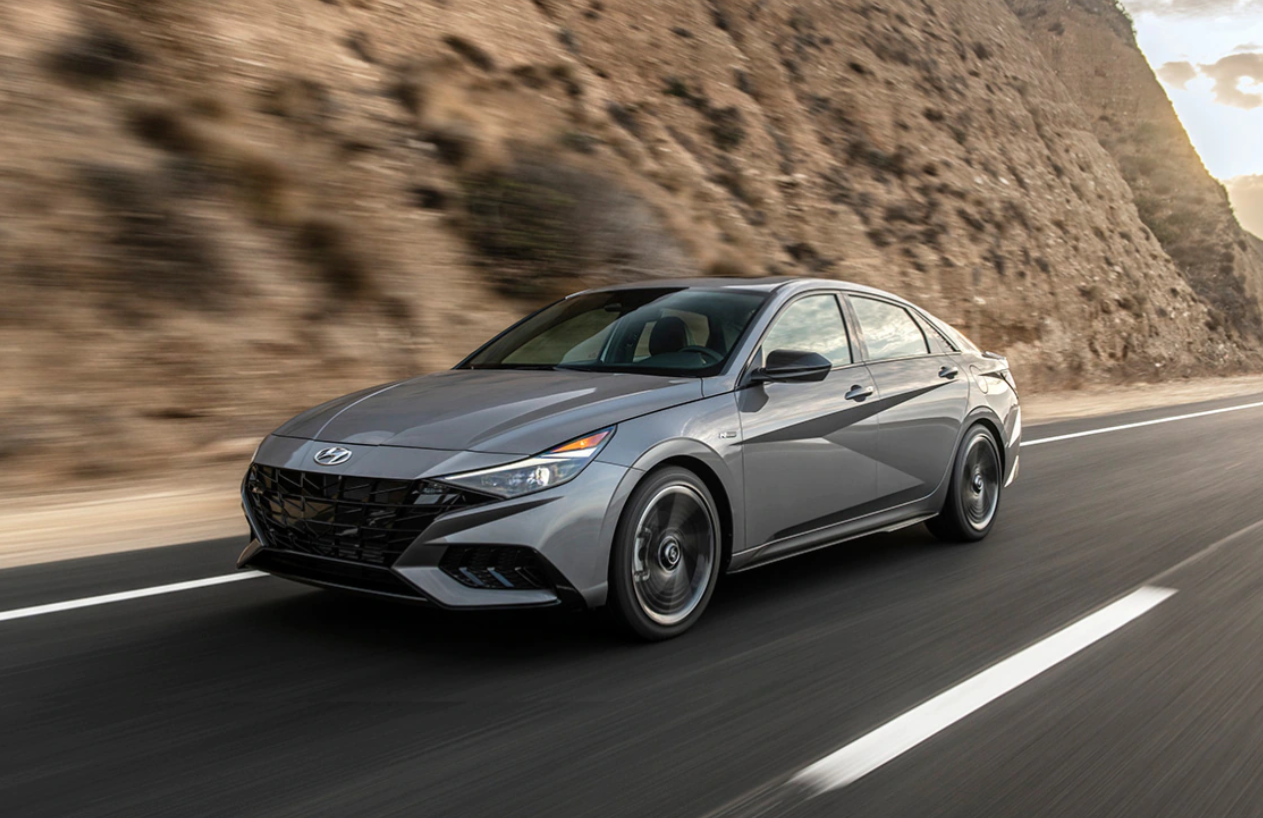

In [48]:
from IPython.display import Image
Image("../input/car-image/Capture.PNG")

**Hello guys in this problem we are going to use linear regression method to predict car price**

**1. Loading libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


**2. Reading data file**

In [7]:
## Reading data file
cars_info = pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv")
cars_info.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**checking if any null value availble in our data**

In [10]:
cars_info.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**3.Plotting correlation matrix**

<AxesSubplot:>

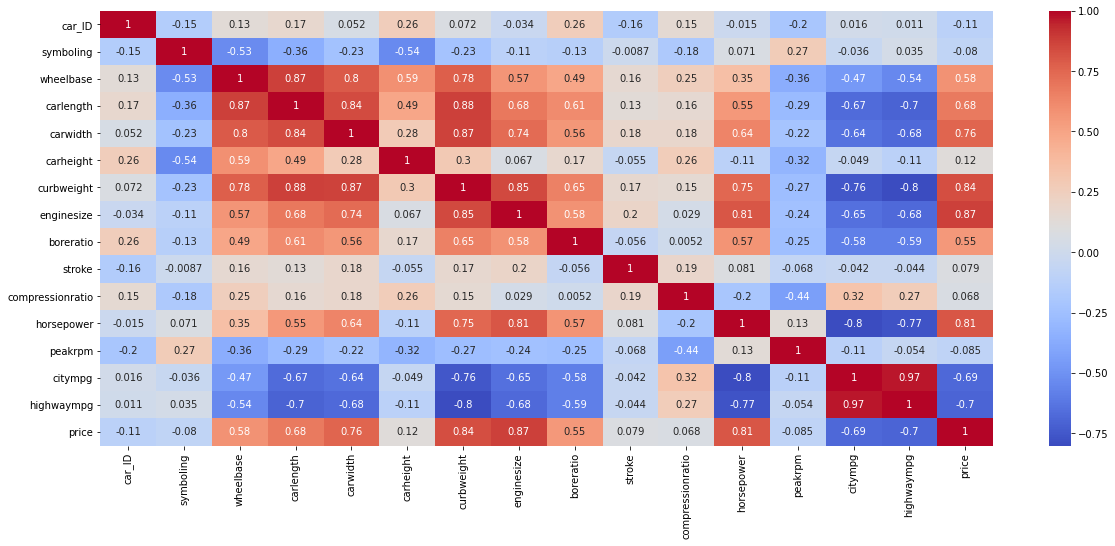

In [13]:
## visulaising using correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(cars_info.corr(),annot=True,cmap='coolwarm')

**from above graph we can see that for price engine size affect more which is +0.87 it means if engine size increase then price also increases
similarly curb weight +0.84, carwidth +0.76,car length +0.68,wheel base +0.58**

**Plotting scatter plot of Engine size vs price**

<AxesSubplot:xlabel='price', ylabel='enginesize'>

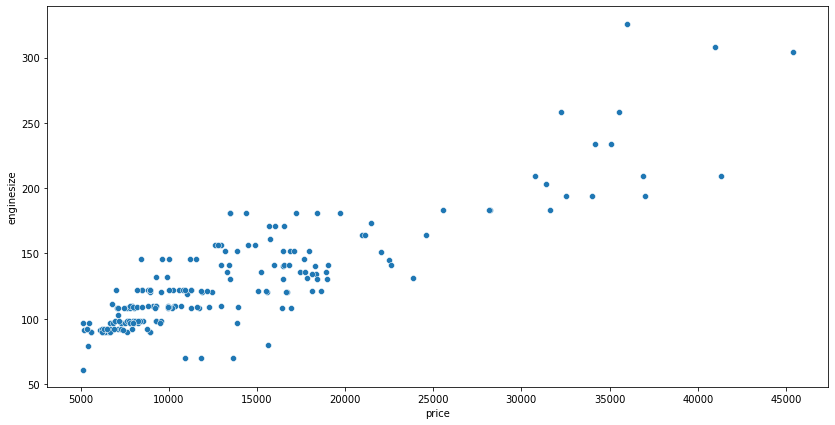

In [15]:
## Engine size vs price
plt.figure(figsize=(14,7))
sns.scatterplot(x='price',y='enginesize',data=cars_info)

**kerb weight
it is nothing but the weight of the vehicle in running condition However, it never includes the payload of the vehicle i.e. weight of the passengers and the carg**

<AxesSubplot:xlabel='price', ylabel='curbweight'>

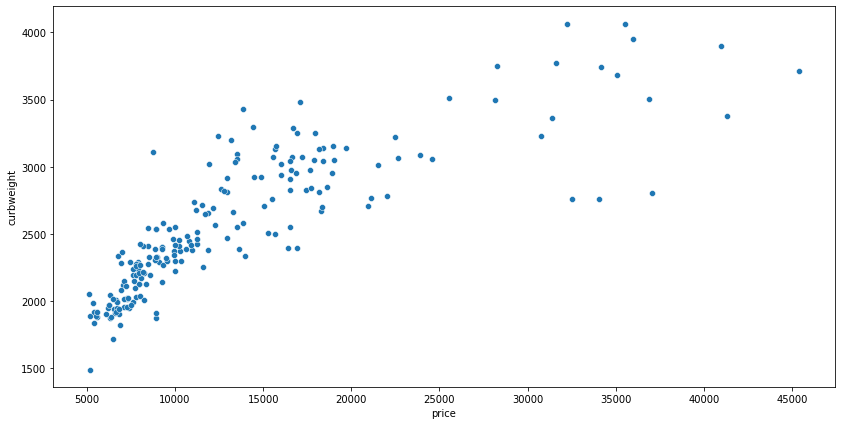

In [16]:
## Curb weight vs price

plt.figure(figsize=(14,7))
sns.scatterplot(x='price',y='curbweight',data=cars_info)

***4. Dr**opping car id, symboling and car name *****

In [18]:
## dopping car id, symboling and car name
cars_info.drop(['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)
x = cars_info.iloc[:, :-1].values #independent variables
y = cars_info.iloc[:, -1].values #dependent variable, price.

**5. plotting histogram of all factors**

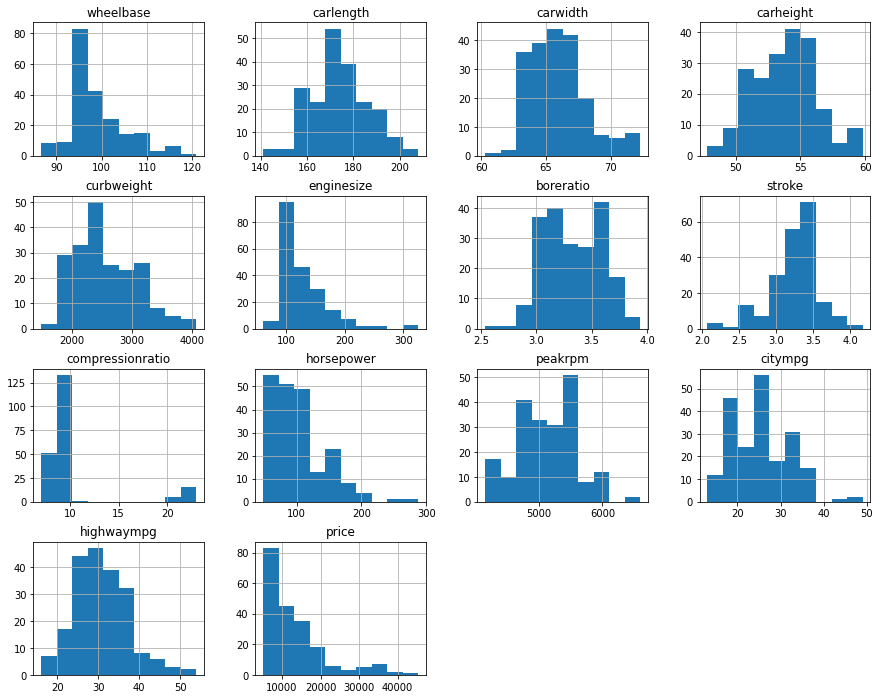

In [34]:
cars_info.hist(bins=10,figsize=(15,12))
plt.show()

In [19]:
cars_info.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Checking x independant variable**

In [24]:
## x - independent variable
print(x)

[['gas' 'std' 'two' ... 5000 21 27]
 ['gas' 'std' 'two' ... 5000 21 27]
 ['gas' 'std' 'two' ... 5000 19 26]
 ...
 ['gas' 'std' 'four' ... 5500 18 23]
 ['diesel' 'turbo' 'four' ... 4800 26 27]
 ['gas' 'turbo' 'four' ... 5400 19 25]]


In [26]:
##y - Dependent variable
print(y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

**6. Implimentation of one hot encoding**

In [27]:
## now we will use one hot encoding to convert all input value in one format
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers= [('encoder', OneHotEncoder(), [0, 1 ,2 ,3 ,4, 5, 11, 12, 14])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

**7. Splitting data set**

In [30]:
##Split the Dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)


**8. Implimenting linear regresssion model**

In [31]:
##Training the Multiple Linear Regression Model on the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [32]:
##Predicting the Test Set Results
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2) # 2 numbers after comma

In [33]:
print(y_pred)

[27737.78 21317.96 20818.23  8190.91  7008.69 17342.79  5666.73  5616.72
  6084.48  7947.27 32952.15 32925.12  6132.11   515.45  4520.88  9112.5
 20626.02 12421.01  7563.59 12218.77 13389.45  8946.47  7475.76 16111.55
 16957.16  9399.72  8285.23  7284.75  5859.27 17091.99  5776.16  6117.44
 12204.7   3989.48 38088.08 26009.92 11692.1  10830.84 17472.04 13119.54
  9180.74]


**9. see the variation between predicted and true value**

In [39]:

print("Predicted_value","true_vale")
for i,j in zip(y_pred, y_test):
    print(i,j)

Predicted_value true_vale
27737.78125 22470.0
21317.9609375 15998.0
20818.234375 20970.0
8190.90625 10898.0
7008.6875 6692.0
17342.7890625 15985.0
5666.7265625 5348.0
5616.71875 7799.0
6084.484375 7295.0
7947.265625 6669.0
32952.1484375 32250.0
32925.125 34184.0
6132.109375 6575.0
515.4453125 6479.0
4520.875 7349.0
9112.5 7609.0
20626.0234375 17859.167
12421.0078125 9989.0
7563.5859375 11248.0
12218.7734375 18620.0
13389.453125 11850.0
8946.46875 7898.0
7475.7578125 7609.0
16111.5546875 17950.0
16957.15625 18399.0
9399.71875 9895.0
8285.2265625 9298.0
7284.75 10295.0
5859.265625 5499.0
17091.9921875 17669.0
5776.15625 5572.0
6117.4375 7299.0
12204.703125 13845.0
3989.484375 8249.0
38088.078125 45400.0
26009.921875 15040.0
11692.1015625 16500.0
10830.8359375 8189.0
17472.0390625 18150.0
13119.5390625 10698.0
9180.7421875 10198.0


**9. Checking accuracy of model**

In [42]:
## Calculating accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8450897517447962

***Conclusion 
**1. Linear regression model gives best result of such predicting kind of data.
**2. Here accuracy of model is 84.50%**
*****

